 # Assigment 6

 __Maayan Raviv__
 
 __Source:__ https://www.gia.edu/diamond-quality-factor

# Introduction

__The data set:__ The dataset contains information on prices of diamonds, as well as various attributes of diamonds, some of which are known to influence their price, provided within the R programming language. 
<br>
<br>
__The variabels:__ A data frame with 53940 rows and 10 variables: Cut, clarity and colour are categorical variables and others are continuous variables.
* _price_- price in US dollar- $326$ - $18823 $$
* _carat_- weight of the diamond (0.2-5.01)
* _cut_- quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* _color_- diamond colour, from J (worst) to D (best)
* _clarity_- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* _x_- length in mm (0-10.74)
* _y_- width in mm (0-58.9)
* _z_- depth in mm (0-31.8)
* _depth_- total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
* _table_- width of top of diamond relative to widest point (43-95)
<br>

Cut, colour and clarity are ordinal variables with 5, 7 and 8 unique values respectively. The cut is the quality of the cut described as Fair, Good, Very Good, Premium, Ideal; Cut grade is is an objective measure of a diamond’s light performance, or, what we generally think of as sparkle. Colour describes the diamond colour from J(worst) to D(best). Clarity is the measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)).Carat is a unit of mass equal to 200 mg and is used for measuring gemstones and pearls. 
<br>

__Objective:__ This data set can help to create a model that will detrmine pricing of diamonds. We will review in this analysis what are the factors that affect the price such as carat weight, cut, clarity and colour. 

__The Questions that will be reviwed in this explantory are:__
* What proportion of diamonds are between .30 and 1.08 carats?
* How many of the diamonds have equal x and y dimensions?
* How many of the diamonds have a carat less than the mean carat value?
* How many diamonds have a Premium cut or better? while the possible values for the quality of a cut are
ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal
* Which diamond has the highest price per carat? What is its value?
* Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within
the data set?
* Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance
of the boxplots.
* Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can
draw from the shape of the resulting distributions.
* Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Load csv file
dataset = pd.read_csv('https://raw.githubusercontent.com/maayan3007/DAV-5400/master/diamonds.csv')
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


__Diamonds Evalution:__
One of the first things most people learn about diamonds is that not all diamonds are created equal. In fact, every diamond is unique. Diamonds come in many sizes, shapes, colors, and with various internal characteristics.All polished diamonds are valuable. That value is based on a combination of factors. Rarity is one of those factors. Diamonds with certain qualities are more rare—and more valuable—than diamonds that lack them. These are known as the 4Cs. When used together, they describe the quality of a finished diamond. The value of a finished diamond is based on this combination.
<br>
A diamond’s value is often affected by the rarity of one or more of the 4Cs. Colorless diamonds are scarce—most diamonds have tints of yellow or brown. So a colorless diamond rates higher on the color grading scale than a diamond that is light yellow. Value and rarity are related: In this case a colorless diamond is more rare and more valuable than one with a slight yellow color. The same relationship between rarity and value exists for clarity, cut, and carat weight.

__Data set initial explantory:__
Carat values are ranging from 0.2 to 5.01 with a mean of 0.797. Depth's values ranging from 43.0 to 79.0 with a mean of 61.74. The table values ranging from to 43.0 to 95.0 with a mean of 57.45. Price is in US dollars with value range from $326 – $ 18,823 with a mean of $ 3932.79.x is the length in mm with value range from 0 to 10.74 with a mean of 5.73. y is the width in mm with values range from 0 to 58.9 with a mean of 5.73. z is the depth in mm with 375 value range from 0 to 31.8 with a mean of 3.53. The summary of data shows that there are some values of x(length), y(width) and z(depth) which are 0.

In [7]:
dataset_copy = dataset.copy()
print(dataset_copy.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


# Question 1
__What proportion of diamonds are between .30 and 1.08 carats?__
<br>
It's known that the larger diamond is probably more valuable than a smaller one. But since that large diamonds are more rare than small diamonds. The more scarce something is, the more it is worth. So a larger stone doesn’t just cost more. It also costs more per carat. A 1-carat diamond weighs the same as four 0.25-carat diamonds. But even if all the other quality factors are equal, the larger diamond is worth much more than the sum of the four smaller diamonds.

<br>
The viz clearly show that the biggest group are diamonds between .30 and 1.08 carat, which consider to be the average diamond. the smallest group is the one the is less then .30, which can be explained by the fact that those diamonds consider to be really small and people are not tend to be intersted in them. Then the next group is for the diamonds that weight more then 1.08, those diamonds comsider to be big diamonds and are more rare and expensive. 

In [11]:
def carat_cat_divider(carat): # Carat range categorizing function
    carat = float(carat)
    if carat<0.3:
        return 'A' # A <0.3
    elif (carat>=0.3) and (carat<=1.08):
        return 'B' # B 0.3<= <=1.08
    else:
        return 'C' # >1.08
    
dataset_copy = dataset[['carat']].copy() # Take a copy of original dataset
dataset_copy['carat_range'] = dataset_copy['carat'].apply(carat_cat_divider) # Add new column for indicate the range of carat

dataset_copy = dataset_copy.groupby(['carat_range'], as_index=False).count()
dataset_copy = dataset_copy.rename(index=str, columns={"carat":"count"})
total = dataset_copy['count'].sum() # Get the total of count column

dataset_copy['%'] = dataset_copy['count'].apply(lambda x: (x*100/total)) # add % column by processing count column

replace_dic = {"A": 'less than 0.3', "B": 'between 0.3 & 1.08', "C": 'greater than 1.08'}
dataset_copy = dataset_copy.replace({"carat_range": replace_dic}) # Replace carat_range column with above replacements

dataset_copy



,carat_range,count,%
0,less than 0.3,1599,2.964405
1,between 0.3 & 1.08,40284,74.682981
2,greater than 1.08,12057,22.352614


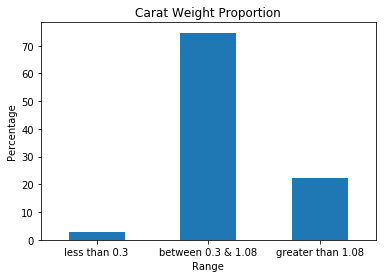

In [12]:
# Let's draw bar chart
data = np.array(list(dataset_copy['%']))
data = pd.DataFrame(data)
axes = data.plot.bar(title='Carat Weight Proportion')
axes.get_legend().remove()
axes.set(xlabel="Range", ylabel="Percentage")
axes.set_xticklabels(dataset_copy['carat_range'], rotation='horizontal')
plt.show()

# Question 2
__How many of the diamonds have equal x and y dimensions?__
In order to review this question we will create a column that will compare the X and Y value and will detrmine if they are equal or not. 
Its length and width measurements indicate the actual physical size, or how big the diamond will appear when viewed from above. Diamonds of the same carat weight can vary in size.

In [15]:
threshold = 0.0 #  adjust equality threshold using the associated variable
def filter_similar_xy(record):
    x = float(record['x'])
    y = float(record['y'])
    if abs(x-y)<=threshold: 
        return 'equal' 
    else:
        return 'not equal'

dataset_copy = dataset[['x', 'y']].copy() # Take a copy of original dataset
dataset_copy['XY_equality'] = dataset_copy.apply(filter_similar_xy, axis=1) 
print(dataset_copy.head())



      x     y XY_equality
0  3.95  3.98   not equal
1  3.89  3.84   not equal
2  4.05  4.07   not equal
3  4.20  4.23   not equal
4  4.34  4.35   not equal


We found that there areonly 17 diamonds that are equal both in length and weight (Y and X)

In [16]:
dataset_copy = dataset_copy.groupby(['XY_equality'], as_index=False).count()
dataset_copy = dataset_copy.rename(index=str, columns={"x":"count"})[['XY_equality', 'count']]
print(dataset_copy)


  XY_equality  count
0       equal     17
1   not equal  53923


# Question 3
__How many of the diamonds have a carat less than the mean carat value?__
The mean is 0.7979, which is not consider to be a high carat. 
<br>
There are 22813 diamonds with a carat that is bigger than the mean. 

In [17]:
data_carat = dataset[['carat']].copy()
mean_val = float(data_carat.mean())

print("Mean value:", mean_val)

def mean_above_below_filter(carat):
    carat = float(carat)
    if carat<mean_val:
        return 'Below Mean'
    elif carat==mean_val:
        return 'Equal to Mean'
    else:
        return 'Above Mean'

data_carat['portion'] = data_carat['carat'].apply(mean_above_below_filter)
data_carat = data_carat.groupby(['portion'], as_index=False).count()
data_carat = data_carat.rename(index=str, columns={"carat":"count"})

if len(data_carat)!=3: # if the equal record missing, let's add
    data_carat = data_carat.append({'count': 0, 'portion': 'equal'}, ignore_index=True)
    
data_carat

Mean value: 0.7979397478679852


,portion,count
0,Above Mean,22813
1,Below Mean,31127
2,equal,0


# Question 4
__How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are
ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal__

A beautifully finished diamond is dazzling, with every facet displaying the craftsman’s skill and care. When a diamond interacts with light, every angle and every facet affects the amount of light returned to the eye. This is what gives it its face-up appearance.
<br>
A diamond’s proportions determine how light performs when it enters the diamond. If light enters through the crown and goes out through the pavilion, the diamond will look dark and unattractive. Diamonds with different proportions and good polish make better use of the light, and will be bright, colorful, and scintillating. The diamond industry has long known that some proportion combinations make light perform better than others. As a general rule, the higher the cut grade, the brighter the diamond.

<br>

There are 35342 diamonds with cut rate premium and ideal which consider to be the best cut level. 
There are more diamonds with ideal cut then premium cut. 

Number of diamonds with premium and ideal level: 35342


         cut  count
0       Fair   1610
1       Good   4906
2      Ideal  21551
3    Premium  13791
4  Very Good  12082


               cut  count
0             Fair   1610
1             Good   4906
4        Very Good  12082
0  Premium & Ideal  35342


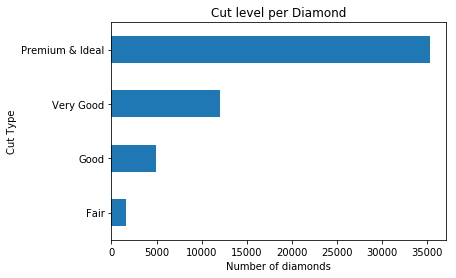

In [26]:
data_cut = dataset[['cut', 'carat']].copy()
data_cut = data_cut.groupby(['cut'], as_index=False).count()
data_cut = data_cut.rename(index=str, columns={"carat":"count"})

prem_ideal_count = int(data_cut[data_cut['cut']=='Premium']['count']) + int(data_cut[data_cut['cut']=='Ideal']['count'])
print("Number of diamonds with premium and ideal level:", prem_ideal_count)

print('\n')



print(data_cut) 

print('\n')

# adding premium + Ideal record to data_cut dataframe
data = pd.DataFrame([['Premium & Ideal', prem_ideal_count]], columns=['cut', 'count'])
data_cut = data_cut.append(data) 

# dropping Premium and Ideal rows
data_cut = data_cut.drop(index=['2', '3'])
print(data_cut)


# Let's develop the chart 
ax = data_cut.plot.barh(title='Cut level per Diamond')
ax.get_legend().remove()
ax.set(xlabel="Number of diamonds", ylabel="Cut Type")
ax.set_yticklabels(data_cut['cut'])
plt.show()

# Question 5
__Which diamond has the highest price per carat? What is its value?__
Carat weight is effected directly on price in addition to other factoes as were discuused above.
The mose expendive diamond 18823 USD that weight 2.29 with Premium cut.
I was surprised to see that that the second most exepensive is a diamond with a very good cut which might suggestive that the carat weight has more effect on the price rather then the cut. Only the third diamond has Ideal cut. 

Highest priced diamond: Diamond No. 27749 | Price: 18823 USD


       carat        cut color clarity  depth  table  price     x     y     z
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
27744   2.29    Premium     I     SI1   61.8   59.0  18797  8.52  8.45  5.24
27742   2.04    Premium     H     SI1   58.1   60.0  18795  8.37  8.28  4.84
27743   2.00    Premium     I     VS1   60.8   59.0  18795  8.13  8.02  4.91
27740   1.71    Premium     F     VS2   62.3   59.0  18791  7.57  7.53  4.70
27741   2.15      Ideal     G     SI2   62.6   54.0  18791  8.29  8.35  5.21


count       10.000000
mean     18802.300000
std         10.965096
min      18791.000000


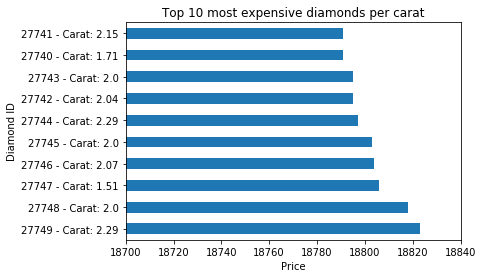

In [29]:
dataset_copy = dataset.copy()
dataset_copy = dataset_copy.sort_values(by=['price'], ascending=False) # Sort the entire dataset on 'price'

print("Highest priced diamond: Diamond No.", dataset_copy.head().index[0], '| Price:', dataset_copy.iloc[0]['price'], 'USD')
print('\n')
print(dataset_copy[:10])
print('\n')
print(dataset_copy[:10]['price'].describe())
print('\n')
# Let's draw bar chart 
dataset_copy = dataset_copy[:10] # Take only top 10 records
data = np.array(list(dataset_copy['price']))
data = pd.DataFrame(data)
axes = data.plot.barh(title='Top 10 most expensive diamonds per carat')
axes.get_legend().remove()
axes.set(ylabel="Diamond ID", xlabel='Price')
axes.set_xbound(lower=18700, upper=18840)

# Create x ticks by combining index and carat columns
tuple_of_index_carat = list(zip(dataset_copy.index, dataset_copy['carat']))
yticks = [str(x) + ' - Carat: ' + str(y) for x, y in tuple_of_index_carat]  # format x ticks to show index-carat-value

axes.set_yticklabels(yticks)
plt.show()

# Question 6
_Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within
the data set?__

The most common cut in the data set is Ideal cut which consider to be the best Cut level. People who tend to but diamonds will usually prefer to have good quality of diamonds so those diamonds would be more popular. 

In [32]:
dataset_copy = dataset[['cut', 'carat']].copy()
dataset_copy = dataset_copy.groupby(['cut'], as_index=False).count()
dataset_copy = dataset_copy.rename(index=str, columns={"carat":"count"})

# Let's add another column to indicate the quality of cut as a number
replace_dic = {"Fair": 0, "Good": 1, "Very Good": 2, 'Premium': 3, 'Ideal': 4}
dataset_copy['cut_quality'] = dataset_copy["cut"].replace(replace_dic)

dataset_copy = dataset_copy.sort_values(by=['cut_quality'], ascending=False) # Sort using cut_quality

dataset_copy[['cut', 'count']]

,cut,count
2,Ideal,21551
3,Premium,13791
4,Very Good,12082
1,Good,4906
0,Fair,1610


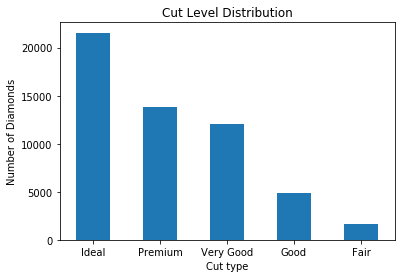

In [34]:
# Let's draw bar chart
data = np.array(list(dataset_copy['count']))
data = pd.DataFrame(data)
axes = data.plot.bar(title='Cut Level Distribution')
axes.get_legend().remove()
axes.set(xlabel="Cut type", ylabel="Number of Diamonds")
axes.set_xticklabels(dataset_copy['cut'], rotation='horizontal')
plt.show()

# Question 7
__Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance
of the boxplots__
<br>
The Fair box is comparatively short which means that most values are in this category are similiar. From the other hand Premium cut box plot is comparatively tall, this suggests diamonds hoave different values in this cut level. 
One box plot, the fair box plots, is much higher ideal box plots This could suggest a difference between groups. 
In addition, by looking at the different box plot it's clearly seen that the ideal cut has a lot of variation in the price, it has a lower median price than any other cut. Premium, good, very good and fair have almost similar kind of median price. Same for the minimum, first quartile, third quartile and the max. 

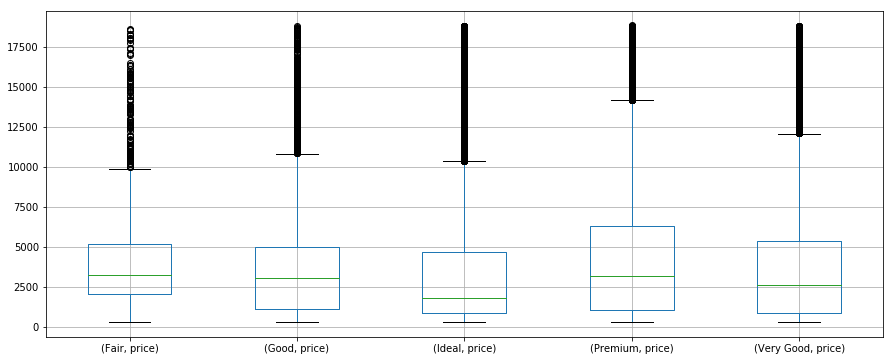

             price                                                             \
             count         mean          std    min      25%     50%      75%   
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

                    
               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0  


In [36]:
dataset_copy = dataset[['cut', 'price']].copy()
dataset_copy = dataset_copy.groupby(['cut'])

dataset_copy.boxplot(subplots=False, figsize=(15, 6))
plt.show()

print(dataset_copy.describe())

# Question 8
__Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can
draw from the shape of the resulting distributions__


The bellow histograms shows the diemnsions of the diamonds.Each attribute effect differntly on the level of cut and it's not fix proportionthat detrmine the level of cut. In order to detrmine that the jewler need to review the proportion between all dimensions where one effect another. It's hard do detrmine any conclusions from this histograms. 


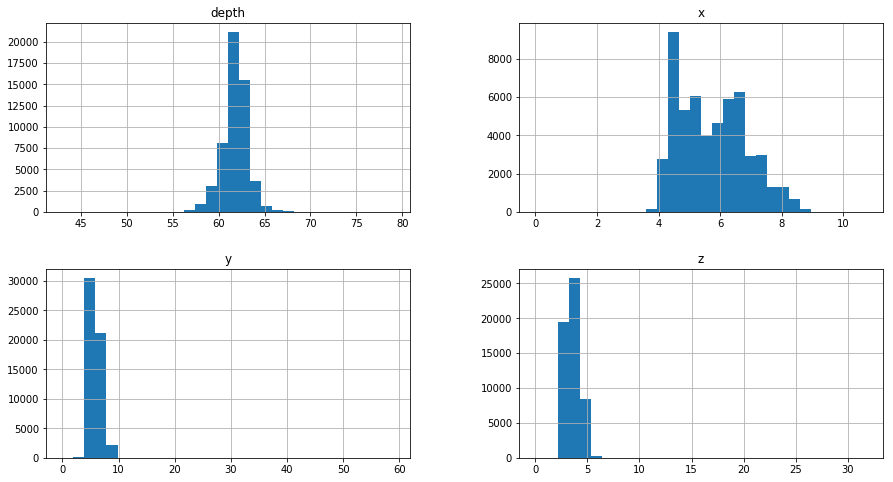

                  x             y             z         depth
count  53940.000000  53940.000000  53940.000000  53940.000000
mean       5.731157      5.734526      3.538734     61.749405
std        1.121761      1.142135      0.705699      1.432621
min        0.000000      0.000000      0.000000     43.000000
25%        4.710000      4.720000      2.910000     61.000000
50%        5.700000      5.710000      3.530000     61.800000
75%        6.540000      6.540000      4.040000     62.500000
max       10.740000     58.900000     31.800000     79.000000


In [37]:
dataset_copy = dataset[['x', 'y', 'z', 'depth']].copy()

dataset_copy.hist(bins=30, figsize=(15, 8))
plt.show()

print(dataset_copy.describe())

# Question 9
__Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?__
<br>
This scatter plot shows that most of the data points are between 0-2.5 carats.Plot also shows that the higher carat the higher price there is a medium positive linear correlation. However in some of the diamonds there might be other factors that effect the price since there are some cases where the data is not linear as in 3 carat where the price is relatively low or in carat 1 where the price is relatively high. 

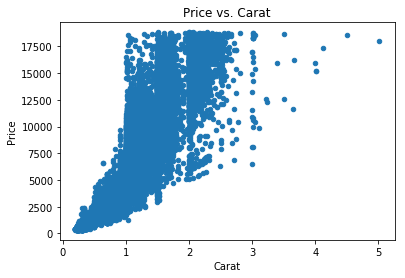

In [40]:
dataset_copy = dataset[['carat', 'price']].copy() # Take a copy of dataset
ax = dataset_copy.plot.scatter(x='carat', y='price', title='Price vs. Carat')
ax.set(xlabel="Carat", ylabel="Price")
plt.show()